In [1]:
import datetime
print(datetime.datetime.now())

2019-11-24 19:54:07.535868


In [2]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

import re
import string
import unicodedata

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from bs4 import BeautifulSoup

import os

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples 
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import pandas_profiling

import itertools

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# This will ensure that matplotlib figures don't get cut off when saving with savefig()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

# Load Data

In [3]:
df = pd.read_csv('OJ.csv',index_col=0)
df.head()

,Purchase,Target,WeekofPurchase,PurchaseWeek,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,...,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PriceDiff_Pos_Neg_None,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
4,MM,1,227,w-227,1,1.69,1.69,0.0,0.0,0,...,0.400000,1.69,1.69,0.0,11,No,0.0,0.0,0.0,1
40,CH,0,227,w-227,4,1.79,1.79,0.0,0.0,0,...,0.920961,1.79,1.79,0.0,11,No,0.0,0.0,0.0,4
98,CH,0,227,w-227,2,1.69,1.69,0.0,0.0,0,...,0.744000,1.69,1.69,0.0,11,No,0.0,0.0,0.0,2
355,MM,1,227,w-227,4,1.79,1.79,0.0,0.0,0,...,0.500000,1.79,1.79,0.0,11,No,0.0,0.0,0.0,4
384,CH,0,227,w-227,7,1.69,1.69,0.0,0.0,0,...,0.072993,1.69,1.69,0.0,11,Yes,0.0,0.0,0.0,0


In [4]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=5)
df.tail()

['Purchase',
 'Target',
 'WeekofPurchase',
 'PurchaseWeek',
 'StoreID',
 'PriceCH',
 'PriceMM',
 'DiscCH',
 'DiscMM',
 'SpecialCH',
 'SpecialMM',
 'LoyalCH',
 'SalePriceMM',
 'SalePriceCH',
 'PriceDiff',
 'PriceDiff_Pos_Neg_None',
 'Store7',
 'PctDiscMM',
 'PctDiscCH',
 'ListPriceDiff',
 'STORE']

(1070, 21)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 4 to 980
Data columns (total 21 columns):
Purchase                  1070 non-null object
Target                    1070 non-null int64
WeekofPurchase            1070 non-null int64
PurchaseWeek              1070 non-null object
StoreID                   1070 non-null int64
PriceCH                   1070 non-null float64
PriceMM                   1070 non-null float64
DiscCH                    1070 non-null float64
DiscMM                    1070 non-null float64
SpecialCH                 1070 non-null int64
SpecialMM                 1070 non-null int64
LoyalCH                   1070 non-null float64
SalePriceMM               1070 non-null float64
SalePriceCH               1070 non-null float64
PriceDiff                 1070 non-null float64
PriceDiff_Pos_Neg_None    1070 non-null int64
Store7                    1070 non-null object
PctDiscMM                 1070 non-null float64
PctDiscCH                 1070 non-null float

,count,mean,std,min,25%,50%,75%,max
Target,1070.0,0.389720,0.487915,0.000000,0.000000,0.00,1.000000,1.000000
WeekofPurchase,1070.0,254.381308,15.558286,227.000000,240.000000,257.00,268.000000,278.000000
StoreID,1070.0,3.959813,2.308984,1.000000,2.000000,3.00,7.000000,7.000000
PriceCH,1070.0,1.867421,0.101970,1.690000,1.790000,1.86,1.990000,2.090000
PriceMM,1070.0,2.085411,0.134386,1.690000,1.990000,2.09,2.180000,2.290000
DiscCH,1070.0,0.051860,0.117474,0.000000,0.000000,0.00,0.000000,0.500000
DiscMM,1070.0,0.123364,0.213834,0.000000,0.000000,0.00,0.230000,0.800000
SpecialCH,1070.0,0.147664,0.354932,0.000000,0.000000,0.00,0.000000,1.000000
SpecialMM,1070.0,0.161682,0.368331,0.000000,0.000000,0.00,0.000000,1.000000
LoyalCH,1070.0,0.565782,0.307843,0.000011,0.325257,0.60,0.850873,0.999947


,Purchase,Target,WeekofPurchase,PurchaseWeek,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,...,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PriceDiff_Pos_Neg_None,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
4,MM,1,227,w-227,1,1.69,1.69,0.0,0.0,0,...,0.400000,1.69,1.69,0.0,11,No,0.0,0.0,0.0,1
40,CH,0,227,w-227,4,1.79,1.79,0.0,0.0,0,...,0.920961,1.79,1.79,0.0,11,No,0.0,0.0,0.0,4
98,CH,0,227,w-227,2,1.69,1.69,0.0,0.0,0,...,0.744000,1.69,1.69,0.0,11,No,0.0,0.0,0.0,2
355,MM,1,227,w-227,4,1.79,1.79,0.0,0.0,0,...,0.500000,1.79,1.79,0.0,11,No,0.0,0.0,0.0,4
384,CH,0,227,w-227,7,1.69,1.69,0.0,0.0,0,...,0.072993,1.69,1.69,0.0,11,Yes,0.0,0.0,0.0,0


,Purchase,Target,WeekofPurchase,PurchaseWeek,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,...,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PriceDiff_Pos_Neg_None,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
688,MM,1,278,w-278,7,2.06,2.13,0.00,0.0,0,...,0.067109,2.13,2.06,0.07,13,Yes,0.0,0.000000,0.07,0
762,CH,0,278,w-278,3,2.09,2.09,0.20,0.0,0,...,0.561472,2.09,1.89,0.20,13,No,0.0,0.095694,0.00,3
769,MM,1,278,w-278,7,2.06,2.13,0.00,0.0,0,...,0.600000,2.13,2.06,0.07,13,Yes,0.0,0.000000,0.07,0
780,CH,0,278,w-278,2,1.99,2.18,0.00,0.0,0,...,0.600000,2.18,1.99,0.19,13,No,0.0,0.000000,0.19,2
980,MM,1,278,w-278,1,1.99,2.13,0.24,0.0,0,...,0.082564,2.13,1.75,0.38,13,No,0.0,0.120603,0.14,1


# Profile Data

In [5]:
pandas_profiling.ProfileReport(df, check_correlation=False)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,22
Number of observations,1070
Total Missing (%),0.0%
Total size in memory,184.0 KiB
Average record size in memory,176.1 B
Numeric,16
Categorical,3
Boolean,3
Date,0
Text (Unique),0
Rejected,0


# Heatmap

<Figure size 2000x1500 with 0 Axes>

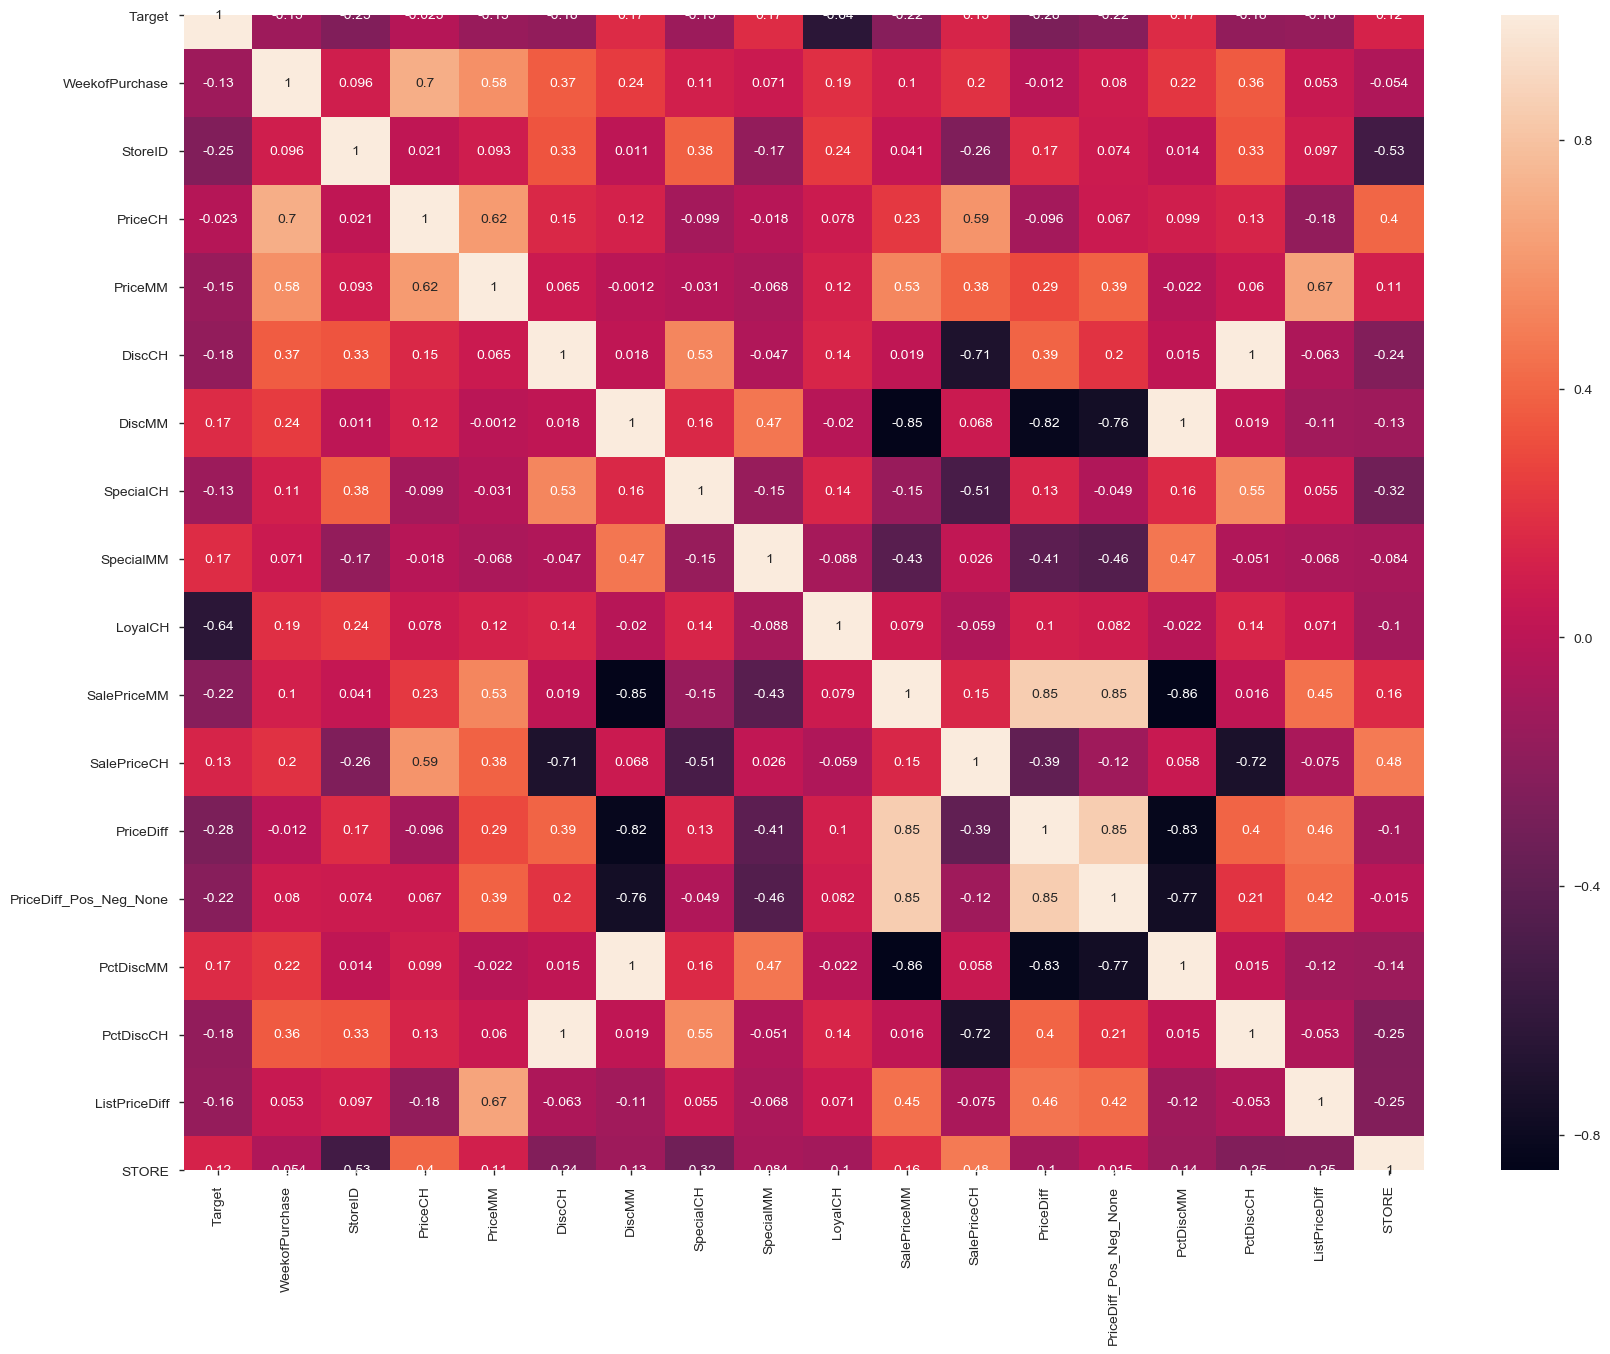

In [6]:
#Initial Heatmap with all features
import seaborn as sns
#Plot Correlations
df_corr=df.corr()

#Plot Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True)

# One-Hot Encoding

In [7]:
#purchase = pd.get_dummies(df.Purchase)
week = pd.get_dummies(df.PurchaseWeek)
store= pd.get_dummies(df.StoreID)
price_diff = pd.get_dummies(df.PriceDiff_Pos_Neg_None)
main = pd.concat([df,store,price_diff,week],axis=1)
main.head()

,Purchase,Target,WeekofPurchase,PurchaseWeek,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,...,w-269,w-270,w-271,w-272,w-273,w-274,w-275,w-276,w-277,w-278
4,MM,1,227,w-227,1,1.69,1.69,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
40,CH,0,227,w-227,4,1.79,1.79,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
98,CH,0,227,w-227,2,1.69,1.69,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
355,MM,1,227,w-227,4,1.79,1.79,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
384,CH,0,227,w-227,7,1.69,1.69,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

In [8]:
#Dropping Features
oranges = main.drop(['Purchase','PriceCH','PriceMM','STORE','StoreID','PriceDiff','Store7','WeekofPurchase','PriceDiff_Pos_Neg_None','PurchaseWeek'], axis=1)
oranges.head()

,Target,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PctDiscMM,PctDiscCH,...,w-269,w-270,w-271,w-272,w-273,w-274,w-275,w-276,w-277,w-278
4,1,0.0,0.0,0,0,0.400000,1.69,1.69,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
40,0,0.0,0.0,0,1,0.920961,1.79,1.79,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
98,0,0.0,0.0,0,0,0.744000,1.69,1.69,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
355,1,0.0,0.0,0,1,0.500000,1.79,1.79,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
384,0,0.0,0.0,0,1,0.072993,1.69,1.69,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
oranges.shape

(1070, 71)

# Splitting Data

In [10]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

X1 = oranges.iloc[:,1:]
y1 = oranges.iloc[:,0]

#split into 80/20 split for training/testing
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X1_train.shape
X1_train.head()
y1.head()

(856, 70)

,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PctDiscMM,PctDiscCH,ListPriceDiff,...,w-269,w-270,w-271,w-272,w-273,w-274,w-275,w-276,w-277,w-278
106,0.00,0.00,0,0,0.797050,2.09,1.89,0.000000,0.000000,0.20,...,0,0,0,0,0,0,0,0,0,0
116,0.00,0.40,0,1,0.875808,1.89,1.99,0.174672,0.000000,0.30,...,0,0,0,0,0,0,0,0,0,0
402,0.00,0.06,0,0,0.274861,2.12,1.86,0.027523,0.000000,0.32,...,0,0,0,1,0,0,0,0,0,0
541,0.47,0.54,1,0,0.400000,1.59,1.39,0.253521,0.252688,0.27,...,0,0,0,0,0,1,0,0,0,0
372,0.00,0.80,0,1,0.392858,1.38,1.96,0.366972,0.000000,0.22,...,0,0,0,0,0,1,0,0,0,0


4      1
40     0
98     0
355    1
384    0
Name: Target, dtype: int64

In [11]:
y1.shape

(1070,)

# Normalize

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X1_train)
#redefine the dataset to include the column headers
X1_train=pd.DataFrame(sc.transform(X1_train), columns=X1_train.columns)
X1_test=pd.DataFrame(sc.transform(X1_test), columns=X1_test.columns)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Feature Correlation

FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B31527188>,
                   color=None, feature_index=None, feature_names=None,
                   labels=None, method='mutual_info-classification', sort=True)

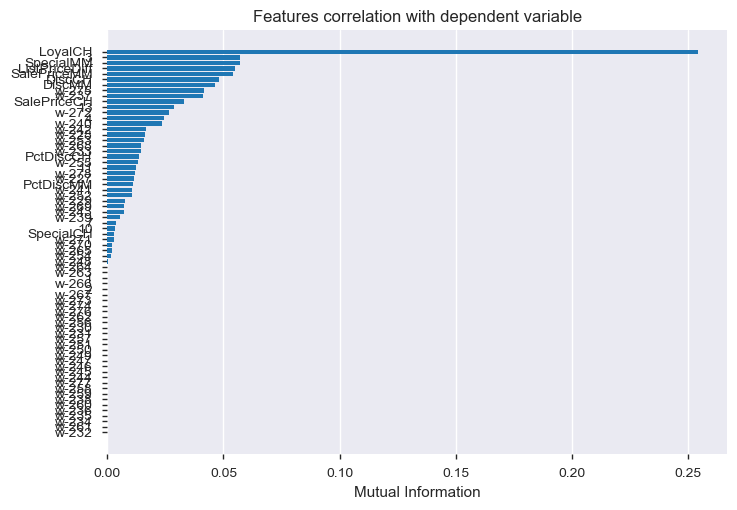

In [13]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(method='mutual_info-classification', sort=True)
visualizer.fit(X1_train, y1_train, random_state=0)
visualizer.poof()

#The top features drive the outcome, but it doesn't explain whether they have a positive or negative impact.

# Recursive Feature Selection (Wrapper)

In [14]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#clf = DecisionTreeClassifier(random_state=0)
clf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, min_samples_split = 8, min_samples_leaf = 8, random_state=42)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(20), scoring='accuracy')
%time rfecv.fit(X1_train, y1_train)

Wall time: 14.2 s


RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='entropy', max_depth=20,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=8, min_samples_split=8,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [15]:
print("Optimal number of features : %d" % rfecv.n_features_)
rfecv.get_support(indices=True)
X1_train.columns[rfecv.get_support()]

Optimal number of features : 36


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64,
       65, 66], dtype=int64)

Index([       'DiscCH',        'DiscMM',     'SpecialCH',     'SpecialMM',
             'LoyalCH',   'SalePriceMM',   'SalePriceCH',     'PctDiscMM',
           'PctDiscCH', 'ListPriceDiff',               1,               2,
                     3,               4,               7,              10,
                    11,              13,         'w-228',         'w-258',
               'w-259',         'w-260',         'w-261',         'w-262',
               'w-263',         'w-264',         'w-265',         'w-267',
               'w-268',         'w-269',         'w-270',         'w-271',
               'w-272',         'w-273',         'w-274',         'w-275'],
      dtype='object')

# New Dataframe

In [16]:
oranges_fs=oranges[['Target','DiscCH','DiscMM','SpecialCH','SpecialMM','LoyalCH','SalePriceMM','SalePriceCH','PctDiscMM','PctDiscCH','ListPriceDiff',3,4,7,10,11,13,'w-228','w-258','w-259','w-260','w-261','w-262','w-263','w-264','w-265','w-267','w-268','w-269','w-270','w-271','w-272','w-273','w-274','w-275']]

In [17]:
oranges_fs.shape
oranges_fs.head()

(1070, 35)

,Target,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PctDiscMM,PctDiscCH,...,w-265,w-267,w-268,w-269,w-270,w-271,w-272,w-273,w-274,w-275
4,1,0.0,0.0,0,0,0.400000,1.69,1.69,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
40,0,0.0,0.0,0,1,0.920961,1.79,1.79,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
98,0,0.0,0.0,0,0,0.744000,1.69,1.69,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
355,1,0.0,0.0,0,1,0.500000,1.79,1.79,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
384,0,0.0,0.0,0,1,0.072993,1.69,1.69,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Train-Test-Split
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

X = oranges_fs.iloc[:,1:]
y = oranges_fs.iloc[:,0]

#split into 80/20 split for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_train.head()
y.head()

# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
#redefine the dataset to include the column headers
X_train=pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

(856, 34)

,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PctDiscMM,PctDiscCH,ListPriceDiff,...,w-265,w-267,w-268,w-269,w-270,w-271,w-272,w-273,w-274,w-275
106,0.00,0.00,0,0,0.797050,2.09,1.89,0.000000,0.000000,0.20,...,0,0,0,0,0,0,0,0,0,0
116,0.00,0.40,0,1,0.875808,1.89,1.99,0.174672,0.000000,0.30,...,0,0,0,0,0,0,0,0,0,0
402,0.00,0.06,0,0,0.274861,2.12,1.86,0.027523,0.000000,0.32,...,0,0,0,0,0,0,1,0,0,0
541,0.47,0.54,1,0,0.400000,1.59,1.39,0.253521,0.252688,0.27,...,0,0,0,0,0,0,0,0,1,0
372,0.00,0.80,0,1,0.392858,1.38,1.96,0.366972,0.000000,0.22,...,0,0,0,0,0,0,0,0,1,0


4      1
40     0
98     0
355    1
384    0
Name: Target, dtype: int64

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
y1.shape

(1070,)

# Plot Boundaries

In [20]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve, auc

# Adopted from: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

def plot_boundaries(X_train, X_test, y_train, y_test, clf, clf_name, ax, hide_ticks=True):
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    X = np.concatenate((X_train, X_test), axis=0)
    y = np.concatenate((y_train, y_test), axis=0)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 18].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02));
    
    
    score = clf.score(X_test, y_test);

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]);
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1];

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8);

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap=cm_bright, edgecolors='k');
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cm_bright, edgecolors='k', alpha=0.6);

    ax.set_xlim(xx.min(), xx.max());
    ax.set_ylim(yy.min(), yy.max());
    if hide_ticks:
        ax.set_xticks(());
        ax.set_yticks(());
    else:
        ax.tick_params(axis='both', which='major', labelsize=18)
        #ax.yticks(fontsize=18);
        
    ax.set_title(clf_name, fontsize=28);
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=35, horizontalalignment='right');
    ax.grid();
    
def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=14, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=18);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)
    
from yellowbrick.model_selection import ValidationCurve

# Hyper Parameter Tuning 

In [21]:
from sklearn.tree import DecisionTreeClassifier

def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    results['mean_fit_time'] = cv_results['mean_fit_time']
    results['mean_score_time'] = cv_results['mean_score_time']
    results['mean_train_score'] = cv_results['mean_train_score']
    results['std_train_score'] = cv_results['std_train_score']
    results['mean_test_score'] = cv_results['mean_test_score']
    results['std_test_score'] = cv_results['std_test_score']
    results['rank_test_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_test_score'], ascending=False)
    return results

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

hyperparam_dist = {"max_depth": sp_randint(1, 50),
              "max_features": sp_randint(1, 35),
              "min_samples_split": sp_randint(2, 11),
              'max_leaf_nodes': [5, 20, 30, 35, 40, 45, 100],
              'min_samples_leaf': [2,4,6,8,10],
              "criterion": ["gini", "entropy"]}

clf = DecisionTreeClassifier(min_samples_split=2)
randomsearch = RandomizedSearchCV(clf, param_distributions=hyperparam_dist, 
                                  cv=5, return_train_score=True, n_iter=100, iid='warn');
%time randomsearch.fit(X_train, y_train);

Wall time: 1.96 s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [23]:
cv_results_to_df(randomsearch.cv_results_)

,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,mean_fit_time,mean_score_time,mean_train_score,std_train_score,mean_test_score,std_test_score,rank_test_score
12,gini,17,34,5,8,5,0.001995,0.000998,0.827687,0.011848,0.828271,0.022190,1
14,entropy,38,17,30,10,3,0.002409,0.000797,0.846080,0.008802,0.816589,0.021223,2
72,gini,26,26,5,10,8,0.001797,0.000597,0.824171,0.016612,0.815421,0.021287,3
62,entropy,11,6,30,8,8,0.001603,0.000991,0.834683,0.014173,0.811916,0.038525,4
84,gini,27,12,100,6,9,0.001795,0.000997,0.850761,0.011720,0.811916,0.026203,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,entropy,30,7,5,8,2,0.001596,0.000798,0.660935,0.012928,0.675234,0.043583,96
81,gini,17,1,35,10,3,0.001396,0.000798,0.693598,0.052420,0.668224,0.052317,97
15,entropy,1,9,40,2,10,0.001801,0.000991,0.658236,0.080138,0.639019,0.071395,98
30,entropy,1,4,40,4,4,0.000992,0.001005,0.628825,0.022330,0.614486,0.014707,99


# Decision Trees

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, 
                             criterion="entropy",
                             max_depth=38,
                             min_samples_split=8, 
                             min_samples_leaf=10, 
                             max_leaf_nodes=20,
                             max_features=17)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=38,
                       max_features=17, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [38]:
from sklearn import metrics
accuracy = accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test,y_pred)
confusion_matrix_ = confusion_matrix(y_test,y_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score: %.2f%%" % (F1_Score * 100.0))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred)))
print(confusion_matrix_)

Accuracy: 80.37%
F1-Score: 71.62%
Log Loss = 6.78
[[119  16]
 [ 26  53]]


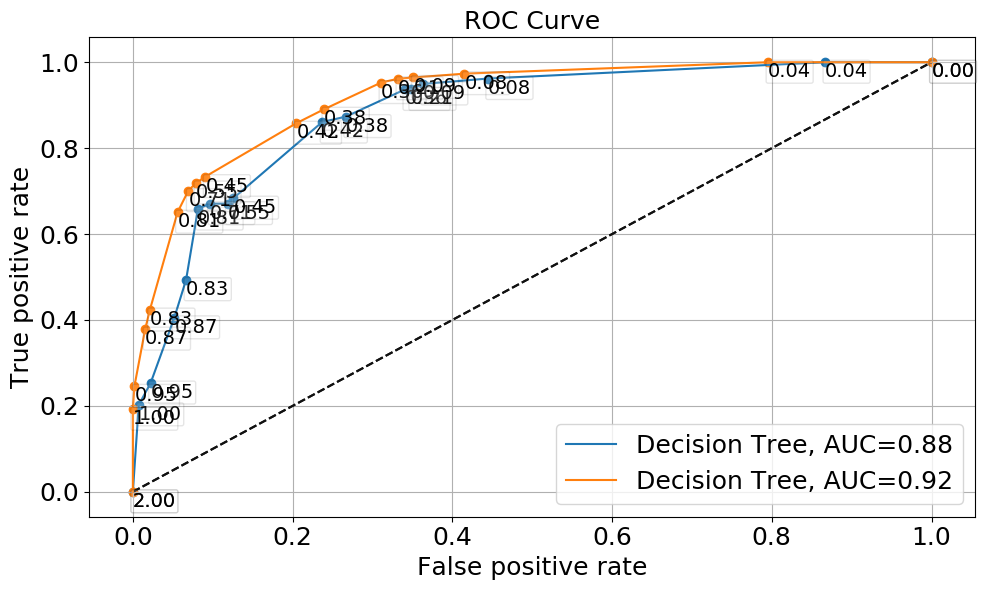

In [39]:
plt.style.use('default');
figure = plt.figure(figsize=(10, 6));    
ax = plt.subplot(1, 1, 1);
plot_roc(clf, X_test, y_test, "Decision Tree", ax)
plot_roc(clf, X_train, y_train, "Decision Tree", ax)
plt.legend(loc='lower right', fontsize=18);
plt.tight_layout();

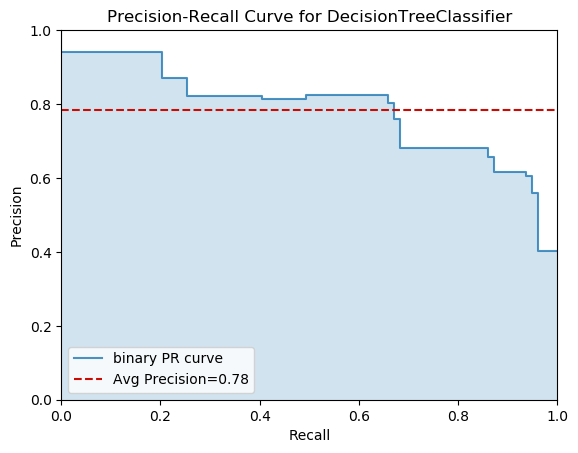

In [40]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(clf);
viz.fit(X_train, y_train);
viz.score(X_test, y_test);
viz.poof();

<Figure size 640x480 with 0 Axes>

[Text(258.33333333333337, 349.0666666666666, 'X[4] <= -0.189\nentropy = 0.968\nsamples = 856\nvalue = [518, 338]'),
 Text(134.33333333333334, 308.0, 'X[10] <= 0.808\nentropy = 0.845\nsamples = 378\nvalue = [103, 275]'),
 Text(82.66666666666667, 266.9333333333333, 'X[4] <= -0.921\nentropy = 0.912\nsamples = 272\nvalue = [89, 183]'),
 Text(41.333333333333336, 225.86666666666665, 'X[7] <= 1.661\nentropy = 0.65\nsamples = 108\nvalue = [18, 90]'),
 Text(20.666666666666668, 184.79999999999998, 'entropy = 0.7\nsamples = 95\nvalue = [18, 77]'),
 Text(62.0, 184.79999999999998, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(124.0, 225.86666666666665, 'X[15] <= -0.467\nentropy = 0.987\nsamples = 164\nvalue = [71, 93]'),
 Text(103.33333333333334, 184.79999999999998, 'X[2] <= 0.97\nentropy = 0.702\nsamples = 63\nvalue = [12, 51]'),
 Text(82.66666666666667, 143.73333333333332, 'entropy = 0.57\nsamples = 52\nvalue = [7, 45]'),
 Text(124.0, 143.73333333333332, 'entropy = 0.994\nsamples = 11\nv

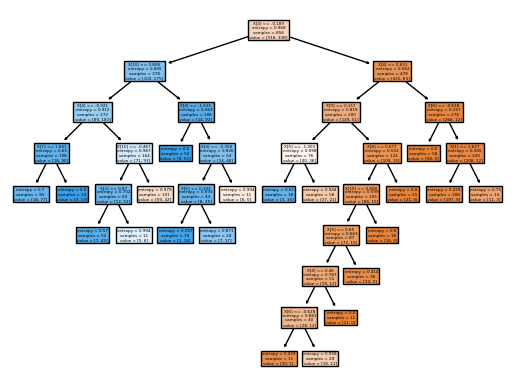

InvocationException: GraphViz's executables not found

In [41]:
# Needs sklearn 0.21 or higher
from sklearn.tree import plot_tree
from IPython.display import Image 
import pydotplus
from sklearn import tree

plt.figure();
plot_tree(clf, filled=True);
plt.show();

# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

## Random Forest

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score,precision_score, log_loss, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import itertools

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [52]:
from sklearn.ensemble import RandomForestClassifier

#clf_rf = RandomForestClassifier(n_estimators=100, 
#                                random_state=42,
#                                criterion="gini",
#                                min_samples_split=10,
#                                min_samples_leaf=4, 
#                                max_depth=12, 
#                                max_leaf_nodes=20,
#                                max_features=30)
clf_rf = RandomForestClassifier(n_estimators=100,
                                random_state=42,
                                criterion="entropy",
                                max_depth=38,
                                min_samples_split=8, 
                                min_samples_leaf=10, 
                                max_leaf_nodes=20,
                                max_features=17)
clf_rf.fit(X_train, y_train)
y_pred_rf=clf_rf.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=38, max_features=17, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [53]:
from sklearn import metrics
accuracy = accuracy_score(y_test, y_pred_rf)
F1_Score = f1_score(y_test,y_pred_rf)
confusion_matrix_ = confusion_matrix(y_test,y_pred_rf)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score: %.2f%%" % (F1_Score * 100.0))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_rf)))
print(confusion_matrix_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Accuracy: 81.78%
F1-Score: 76.36%
Log Loss = 6.29
[[112  23]
 [ 16  63]]
Mean Absolute Error: 0.1822429906542056
Mean Squared Error: 0.1822429906542056
Root Mean Squared Error: 0.4268992746002335


# XG Boost

In [54]:
X_train.head()

,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PctDiscMM,PctDiscCH,ListPriceDiff,...,w-265,w-267,w-268,w-269,w-270,w-271,w-272,w-273,w-274,w-275
0,-0.454671,-0.574558,-0.423159,-0.434613,0.755349,0.509444,0.535388,-0.579725,-0.452245,-0.174989,...,-0.158587,-0.158587,-0.128946,-0.17699,-0.162416,-0.133551,-0.158587,-0.128946,-0.203378,-0.173448
1,-0.454671,1.299048,-0.423159,2.300895,1.008731,-0.296105,1.219917,1.142515,-0.452245,0.772451,...,-0.158587,-0.158587,-0.128946,-0.17699,-0.162416,-0.133551,-0.158587,-0.128946,-0.203378,-0.173448
2,-0.454671,-0.293517,-0.423159,-0.434613,-0.924655,0.630276,0.330029,-0.308353,-0.452245,0.961939,...,-0.158587,-0.158587,-0.128946,-0.17699,-0.162416,-0.133551,6.305704,-0.128946,-0.203378,-0.173448
3,3.366578,1.954810,2.363179,-0.434613,-0.522054,-1.504428,-2.887257,1.919955,3.433368,0.488219,...,-0.158587,-0.158587,-0.128946,-0.17699,-0.162416,-0.133551,-0.158587,-0.128946,4.916957,-0.173448
4,-0.454671,3.172653,-0.423159,2.300895,-0.545031,-2.350254,1.014558,3.038566,-0.452245,0.014499,...,-0.158587,-0.158587,-0.128946,-0.17699,-0.162416,-0.133551,-0.158587,-0.128946,4.916957,-0.173448


In [55]:
#define XG Boost Parameters
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance
from scipy.stats import randint as sp_randint

hyperparam_dist = {"max_depth": sp_randint(1, 10),
                   "learning_rate": (0.1, 0.5),
                   "n_estimators": sp_randint(80, 100),
                   "eta": (0.01,0.2)}
xgb_clf = XGBClassifier()
    
randomsearch = RandomizedSearchCV(xgb_clf, param_distributions=hyperparam_dist, 
                                 cv=5, return_train_score=True, n_iter=100, iid='warn', scoring= 'neg_log_loss');

In [56]:
fitted_rs_xgb = randomsearch.fit(X_train, y_train)

In [57]:
fitted_rs_xgb.best_params_

{'eta': 0.2, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 84}

In [65]:
from xgboost import XGBClassifier
clf_xg = XGBClassifier(n_estimators=84, max_depth=2, eta=0.2, learning_rate=0.1)
clf_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=84, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [66]:
y_pred_xg = clf_xg.predict(X_test)
#predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred_xg)
F1_Score = f1_score(y_test, y_pred_xg)
Recall = recall_score(y_test, y_pred_xg)
Precision = precision_score(y_test, y_pred_xg)
log_loss_ = log_loss(y_test, y_pred_xg)
confusion_matrix_ = confusion_matrix(y_test, y_pred_xg)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1-Score: %.2f%%" % (F1_Score * 100.0))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_xg)))
print(confusion_matrix_)


Accuracy: 80.84%
F1-Score: 75.45%
Log Loss = 6.62
[[110  25]
 [ 16  63]]


# Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb

y_pred_gnb = gnb.predict(X_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_gnb)

array([[80, 55],
       [18, 61]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
gnb.theta_ # Mean of each feature per class
gnb.sigma_ # Variance of each feature per class

array([[ 0.15604464, -0.11736908,  0.12012331, -0.12304014,  0.52104788,
         0.1756386 , -0.10843922, -0.11674393,  0.1563263 ,  0.14399499,
        -0.18474547,  0.13094046,  0.19027332, -0.1248148 , -0.14253004,
         0.19373508, -0.05893746,  0.02369729,  0.01291501, -0.01096242,
        -0.00718342, -0.01781338,  0.0014461 ,  0.0498056 ,  0.06604129,
         0.00364466,  0.02325723,  0.09298916,  0.04497932,  0.02829153,
         0.02860331,  0.02325723,  0.02397299, -0.12758814],
       [-0.23914534,  0.17987332, -0.1840943 ,  0.18856447, -0.798529  ,
        -0.26917395,  0.16618791,  0.17891525, -0.23957699, -0.22067872,
         0.28313063, -0.20067206, -0.2916023 ,  0.19128422,  0.21843361,
        -0.29690761,  0.09032428, -0.03631716, -0.01979283,  0.01680039,
         0.01100892,  0.0272998 , -0.00221622, -0.07632929, -0.10121121,
        -0.00558561, -0.03564273, -0.14251002, -0.0689328 , -0.04335803,
        -0.04383585, -0.03564273, -0.03673967,  0.19553448]])

array([[1.30118255, 0.75521961, 1.21861204, 0.7552336 , 0.55953325,
        0.80692713, 1.14004988, 0.76447366, 1.30439423, 0.81606248,
        0.66730258, 1.29296579, 1.08717526, 0.81536154, 0.49461163,
        0.7816412 , 0.61422557, 1.16254264, 1.07541086, 0.9357286 ,
        0.9451659 , 0.87707639, 1.00965298, 1.31182359, 1.40160213,
        1.02239089, 1.17682421, 1.50028843, 1.26761079, 1.20726164,
        1.17500979, 1.17682421, 1.1124239 , 0.27025273],
       [0.44391654, 1.32167084, 0.60896262, 1.31635782, 0.62131443,
        1.1761608 , 0.73972764, 1.30805664, 0.43865301, 1.20141669,
        1.3774035 , 0.48447156, 0.725884  , 1.22250188, 1.69568351,
        1.188969  , 1.57773448, 0.74871664, 0.88378214, 1.09803235,
        1.08383541, 1.18715431, 0.98519827, 0.51248872, 0.36759908,
        0.96563342, 0.72690969, 0.19972479, 0.58202231, 0.67925576,
        0.7286143 , 0.72690969, 0.82547482, 2.05518846]])

In [63]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_gnb)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_gnb)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gnb)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_gnb)))

Accuracy = 0.66
Kappa = 0.33
F1 Score = 0.63
Log Loss = 11.78


## AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier


clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
            criterion="entropy",
            max_depth=38,
            min_samples_split=8, 
            min_samples_leaf=10, 
            max_leaf_nodes=20,
            max_features=17
            #max_depth=19, 
            #min_samples_split=9,
            #min_samples_leaf=2
        ),
    n_estimators=45, random_state=0)
clf_ada.fit(X_train, y_train)

y_pred_ada = clf_ada.predict(X_test)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=38,
                                                         max_features=17,
                                                         max_leaf_nodes=20,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=8,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                            

In [88]:
print("Accuracy = {:.3f}".format(accuracy_score(y_test, y_pred_ada)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_ada)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_ada)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_ada)))

Accuracy = 0.790
Kappa = 0.56
F1 Score = 0.73
Log Loss = 7.26


Wall time: 37.8 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B453A0308>,
                cv=5, groups=None, logx=False, model=None, n_jobs=1,
                param_name='n_estimators',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                pre_dispatch='all', scoring='roc_auc')

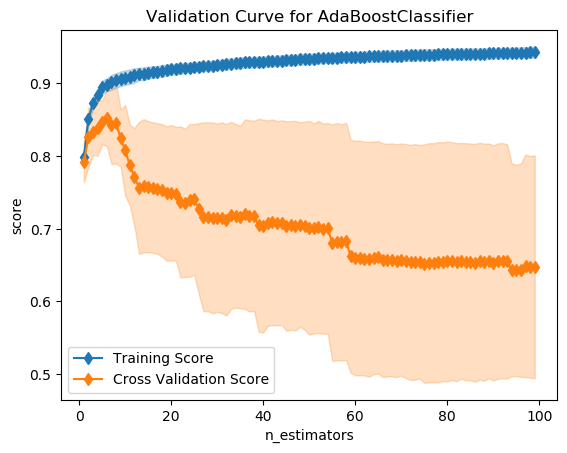

In [89]:
viz = ValidationCurve( AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=0), param_name="n_estimators", param_range=np.arange(1, 100), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
#viz.poof(outpath='out/default-ada-n_estimators.png')
viz.poof()

# Gradiant Tree Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gt = GradientBoostingClassifier(min_samples_split=9, min_samples_leaf=2, max_depth=19, 
                                    max_leaf_nodes=5, n_estimators=100, learning_rate=0.5, 
                                    max_features=32, random_state=0)
clf_gt.fit(X_train, y_train)
#clf_gt

y_pred_gt = clf_gt.predict(X_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=19,
                           max_features=32, max_leaf_nodes=5,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=9,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [91]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, y_pred_gt, target_names=class_names))
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_gt)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_gt)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gt)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_gt)))

Accuracy = 0.80
Kappa = 0.58
F1 Score = 0.75
Log Loss = 6.94


Wall time: 4.95 s


ValidationCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B45599B08>,
                cv=5, groups=None, logx=False, model=None, n_jobs=1,
                param_name='learning_rate',
                param_range=array([1.00000000e-03, 6.99310345e-02, 1.38862069e-01, 2.07793103e-01,
       2.76724138e-01, 3.45655172e-01, 4.14586207e-01, 4.83517241e-01,
       5.52448276e-01, 6.21379310e-01, 6.90310345e-01, 7.59241379e-01,
       8.28172414e-01, 8.97103448e-01, 9.66034483e-01, 1.03496552e+00,
       1.10389655e+00, 1.17282759e+00, 1.24175862e+00, 1.31068966e+00,
       1.37962069e+00, 1.44855172e+00, 1.51748276e+00, 1.58641379e+00,
       1.65534483e+00, 1.72427586e+00, 1.79320690e+00, 1.86213793e+00,
       1.93106897e+00, 2.00000000e+00]),
                pre_dispatch='all', scoring='roc_auc')

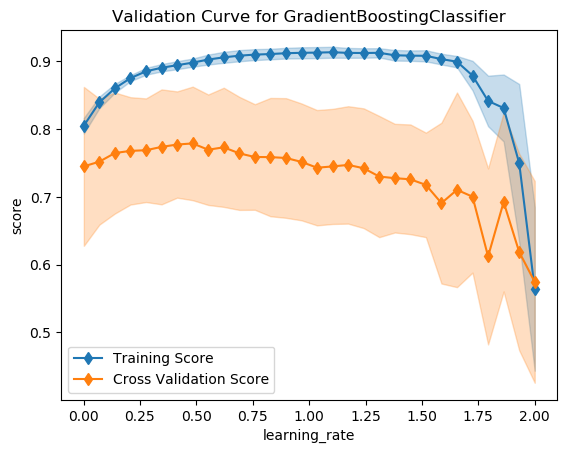

In [92]:
viz = ValidationCurve(GradientBoostingClassifier(n_estimators=100, max_depth=1, max_features=1, random_state=0), param_name="learning_rate", param_range=np.linspace(0.001,2,30), cv=5, scoring="roc_auc")
%time viz.fit(X, y)
#viz.poof(outpath='out/default-gbm-learning_rate.png')
viz.poof()

# SVM-Linear

In [93]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=0.025)
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Parameters

In [94]:
svm_clf.n_support_
svm_clf.support_vectors_
svm_clf.dual_coef_ 
svm_clf.intercept_ 

array([198, 197])

array([[ 3.3665784 ,  1.95480958,  2.36317908, ..., -0.12894603,
         4.91695745, -0.17344808],
       [-0.45467092, -0.57455774, -0.42315879, ..., -0.12894603,
        -0.2033778 , -0.17344808],
       [-0.45467092, -0.57455774, -0.42315879, ..., -0.12894603,
        -0.2033778 , -0.17344808],
       ...,
       [-0.45467092,  1.29904768,  2.36317908, ..., -0.12894603,
        -0.2033778 , -0.17344808],
       [ 0.35836085,  1.29904768,  2.36317908, ..., -0.12894603,
        -0.2033778 , -0.17344808],
       [ 3.61048793, -0.57455774, -0.42315879, ..., -0.12894603,
        -0.2033778 , -0.17344808]])

array([[-0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.00966334,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.01546516, -0.025     , -0.025     ,
        -0.025     , -0.01629219, -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.025     , -0.025     , -0.025     ,
        -0.025     , -0.025     , -0.00976763, -0.0

array([-0.47810659])

In [95]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_svm)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_svm)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_svm)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_svm)))
print(confusion_matrix(y_test, y_pred_svm))

Accuracy = 0.81
Kappa = 0.59
F1 Score = 0.74
Log Loss = 6.62
[[114  21]
 [ 20  59]]


# Neural Net

In [96]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='lbfgs', activation='relu', alpha=1e-3, 
                       hidden_layer_sizes=(3), random_state=1, verbose=True)
nn_clf.fit(X_train, y_train)

y_pred_nn = nn_clf.predict(X_test)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [97]:
nn_clf.loss_

0.3073787612767527

In [98]:
nn_clf.n_layers_

3

In [99]:
w = nn_clf.coefs_ # The ith element in the list represents the weight matrix corresponding to layer i.
w

[array([[-0.09435255,  0.39011942,  0.09943987],
        [ 0.41296811, -0.12291033, -0.05612079],
        [ 0.41526567,  0.36514373, -1.19838009],
        [ 0.08388691, -0.03581079, -0.25557011],
        [ 1.3141685 ,  3.3123023 , -2.91812747],
        [-0.28236201,  0.04084525,  0.09153832],
        [ 0.0571729 , -0.0538009 ,  0.19052296],
        [-0.06634835,  0.31081603, -0.40946905],
        [ 0.46156981,  0.37210038,  0.34095024],
        [-0.64608547, -0.19736733,  0.44332315],
        [ 0.06456197,  0.41231712,  0.25877965],
        [-2.3627445 , -1.43590669,  0.12730943],
        [ 0.39128007,  0.46536381, -0.7971181 ],
        [ 0.01733098,  0.47967447, -0.06855285],
        [-0.40923746, -0.23609366,  0.67099717],
        [ 0.25607367,  0.51001769, -0.47423638],
        [-0.08115347, -0.26068637, -0.0968018 ],
        [ 0.12924254,  0.12041069, -0.08607016],
        [ 0.12707725,  0.06769318, -0.11049832],
        [-0.6590727 ,  0.27966102,  1.23994887],
        [-0.39347733

In [100]:
b = nn_clf.intercepts_ # The ith element in the list represents the bias vector corresponding to layer i + 1.
b

[array([ 0.86884771,  0.94617706, -0.55341195]), array([-2.09731592])]

In [101]:
nn_clf.out_activation_

'logistic'

In [102]:
#nn_clf.predict_proba([[0.5,1]])

In [103]:
def relu_af(x):
    return max(0, x)
    
x = [0.5, 1]

layer_id=0
h0 = (x[0] * w[layer_id][0][0]) + ((x[1] * w[layer_id][1][0])) + (1 * b[layer_id][0])
print(h0)
print(relu_af(h0))

h1 = (x[0] * w[layer_id][0][1]) + ((x[1] * w[layer_id][1][1])) + (1 * b[layer_id][1])
print(h1)
print(relu_af(h1))

h2 = (x[0] * w[layer_id][0][2]) + ((x[1] * w[layer_id][1][2])) + (1 * b[layer_id][2])
print(h2)
print(relu_af(h2))

layer_id=1
o = (h0 * w[layer_id][0][0]) + ((h1 * w[layer_id][1][0])) + ((h2 * w[layer_id][2][0])) + (1 * b[layer_id][0])
print(o)
print(relu_af(o))

1.2346395392671732
1.2346395392671732
1.0183264415810491
1.0183264415810491
-0.5598128029850211
0
-2.3468231508459163
0


In [104]:
print(confusion_matrix(y_test, y_pred_nn))

[[111  24]
 [ 21  58]]


In [105]:
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_nn)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_nn)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_nn)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_nn)))

Accuracy = 0.79
Kappa = 0.55
F1 Score = 0.72
Log Loss = 7.26
